# Introducción a librerías de DataScience en Python: Kmeans con Sklearn

- En este curso haremos una revisión del algoritmo de kmeans y resolveremos un ejemplo de clasificación de variables meteoceánicas utilizando la librería de Python Sklearn.
- El objetivo de este notebook es explorar de una manera sencilla y concisa la implementación de ciertos algoritmos populares mediante la librería de sklearn. 

# Acceso a datos

In [3]:
from pydap.cas.get_cookies import setup_session
from pydap.client import open_url
import xarray as xr
import getpass

#Atlantic -Iberian Biscay Irish- Ocean Wave Reanalysis
url1 = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_wav_my_0.05deg-2D_PT1H-i"

#url1b = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i" #corrupted
url1b = "https://nrt.cmems-du.eu/thredds/dodsC/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_Prev" #previous version

#Global Ocean Hourly Sea Surface Wind and Stress from Scatterometer and Model
url3 = "https://nrt.cmems-du.eu/thredds/dodsC/cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H"


#Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis
url2 = "https://my.cmems-du.eu/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-2D_PT1H-m"


username = "aturlione" 
password = getpass.getpass('Enter your password: ')

Enter your password: ········


In [5]:
#iniciate session 
cas_url = "https://cmems-cas.cls.fr/cas/login"      
session = setup_session(cas_url, username, password)
session.cookies.set("CASTGC", session.cookies.get_dict()["CASTGC"]) 
#needed to keep the session alive, CAS: Central Authentication Service, TGC:Long Term Authentication

def data_access(url, username, password):
    print('Accediendo a los datos {}'.format(url[-9:]))
    data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    ds = xr.open_dataset(data_store)
    print('Accediendo a datos finalizado')
    return ds

In [6]:
ds1=data_access(url1, username, password) 

Accediendo a los datos 2D_PT1H-i
Accediendo a datos finalizado


In [8]:
ds3=data_access(url1b, username, password) 

Accediendo a los datos 1H-i_Prev
Accediendo a datos finalizado


In [9]:
ds4=data_access(url3, username, password) 

Accediendo a los datos 5deg_PT1H
Accediendo a datos finalizado


# Exploración de datos

In [7]:
print('Inside ds1:')
print('--------------------------------\n')
for var in ds1.variables:
    print(var,':',ds1[var].attrs['standard_name'],'\n')  

Inside ds1:
--------------------------------

latitude : latitude 

longitude : longitude 

VHM0 : sea_surface_wave_significant_height 

VHM0_SW1 : sea_surface_primary_swell_wave_significant_height 

VHM0_SW2 : sea_surface_secondary_swell_wave_significant_height 

VHM0_WW : sea_surface_wind_wave_significant_height 

VMDR : sea_surface_wave_from_direction 

VMDR_SW1 : sea_surface_primary_swell_wave_from_direction 

VMDR_SW2 : sea_surface_secondary_swell_wave_from_direction 

VMDR_WW : sea_surface_wind_wave_from_direction 

VPED : sea_surface_wave_from_direction_at_variance_spectral_density_maximum 

VSDX : sea_surface_wave_stokes_drift_x_velocity 

VSDY : sea_surface_wave_stokes_drift_y_velocity 

VTM01_SW1 : sea_surface_primary_swell_wave_mean_period 

VTM01_SW2 : sea_surface_secondary_swell_wave_mean_period 

VTM01_WW : sea_surface_wind_wave_mean_period 

VTM02 : sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment 

VTM10 : sea_surface_wave_mean_period_

In [9]:
print('Inside ds3:')
print('--------------------------------\n')
for var in ds3.variables:
    print(var,':',ds3[var].attrs['standard_name'],'\n')  

Inside ds3:
--------------------------------

longitude : longitude 

latitude : latitude 

depth : depth 

time : time 

uo : eastward_sea_water_velocity 

vo : northward_sea_water_velocity 

vsdx : sea_surface_wave_stokes_drift_x_velocity 

vsdy : sea_surface_wave_stokes_drift_y_velocity 

utide : surface_sea_water_x_velocity_due_to_tide 

vtide : surface_sea_water_y_velocity_due_to_tide 

utotal : surface_sea_water_x_velocity 

vtotal : surface_sea_water_y_velocity 



In [10]:
print('Inside ds4:')
print('--------------------------------\n')
for var in ds4.variables:
    print(var,':',ds4[var].attrs['standard_name'],'\n')

Inside ds4:
--------------------------------

lat : latitude 

lon : longitude 

time : time 

eastward_wind : eastward_wind 

eastward_wind_bias : eastward_wind_bias 

eastward_wind_sdd : eastward_wind_standard_deviation_of_differences 

northward_wind : northward_wind 

northward_wind_bias : northward_wind_bias 

northward_wind_sdd : northward_wind_standard_deviation_of_differences 

wind_divergence : divergence_of_wind 

wind_divergence_bias : divergence_of_wind_bias 

wind_divergence_dv : divergence_of_wind_difference_of_variances 

wind_curl : atmosphere_relative_vorticity 

wind_curl_bias : atmosphere_relative_vorticity_bias 

wind_curl_dv : atmosphere_relative_vorticity_difference_of_variances 

eastward_stress : surface_downward_eastward_stress 

eastward_stress_bias : surface_downward_eastward_stress_bias 

eastward_stress_sdd : surface_downward_eastward_stress_standard_deviation_of_differences 

northward_stress : surface_downward_northward_stress 

northward_stress_bias : su

## Graficamos algunas de las variables

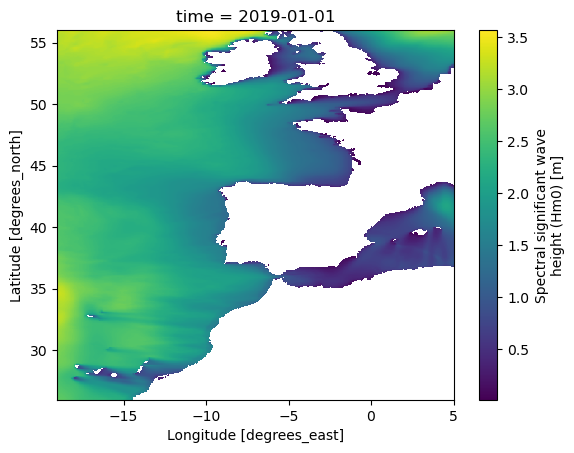

In [11]:
ds1.VHM0.loc['2019-01-01T00:00:00.000000000', :, :].plot() 

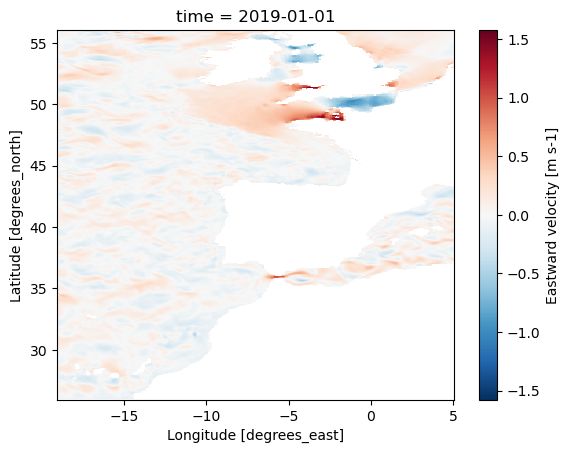

In [12]:
ds2.uo.interp(time=['2019-01-01T00:00:00.000000000'], method='linear').plot() 

# Pre-proceso

## Seleccionamos las variables para hacer el clustering

In [10]:
lat = 30
long = -15

date_i='2020-08-01T00:00:00.000000000'
date_f='2020-10-01T00:00:00.000000000'
date_i2='2020-07-31T00:30:00.000000000'
date_f2='2020-10-01T00:30:00.000000000'

DIR = ds1.VMDR.loc[date_i:date_f, lat, long]
HS = ds1.VHM0.loc[date_i:date_f,  lat, long]
TP = ds1.VTM01_SW1.loc[date_i:date_f,  lat, long]

In [11]:
print('interpolation 1')
U=ds3.utotal.loc[date_i2:date_f2, :,lat,long]
U = U.interp(time=DIR.time.values[:], method='linear')

interpolation 1


In [12]:
print('interpolation 2')
V=ds3.vtotal.loc[date_i2:date_f2, :,lat,long]
V = V.interp(time=DIR.time.values[:], method='linear')

interpolation 2


In [13]:
EW=ds4.eastward_wind.loc[date_i:date_f].sel(lat=lat, lon=long, method="nearest")

In [269]:
print('DIR:',DIR.attrs['standard_name'])
print('HS:',HS.attrs['standard_name'])
print('TP:',TP.attrs['standard_name'])
print('U:',U.attrs['standard_name'])
print('V:',V.attrs['standard_name'])
print('EW:',EW.attrs['standard_name'])

DIR: sea_surface_wave_from_direction
HS: sea_surface_wave_significant_height
TP: sea_surface_primary_swell_wave_mean_period
U: surface_sea_water_x_velocity
V: surface_sea_water_y_velocity
EW: eastward_wind


In [270]:
#We must reshape U and V to create the data frame
Ur=U.values.reshape(len(U))
Vr=V.values.reshape(len(U))

## Transformaciones en el espacio de variables

- Es necesario estandarizar el espacio de variables para evitar que las variables con mayor escala tengan un peso mayor.
- Usualmente también se reduce el espacio de variables aplicando una análisis de componentes principales (PCA), ya que estas capturan estructuras globales de los datos lo que mejora la creación de "clusters".

In [357]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import numpy as np

X=np.array([DIR,HS,TP,Ur,Vr,EW]).T
    
def pre_processing(X,PCAs,n_comp=None,normalizer=None):
    
    # Standardize data: transform data, std=1 and mean=0
    X_n=StandardScaler().fit_transform(X)    
    
    if normalizer:            
        # Standardize data
        X_s=StandardScaler().fit_transform(X)  

        # Normalizing the Data, norm = 1 
        X_n= normalize(X_s) 
    
    Xdf=pd.DataFrame(X_n)      

    if PCAs==True:        
        # Reducing the dimensions of the data 
        pca = PCA(n_components = n_comp) 
        X_principal = pca.fit_transform(X_n) 
        X_principal = pd.DataFrame(X_principal)       
        X_p=X_principal       

    else:
        X_p=Xdf        
    return X_p

## PCAS "in a nutshell"

El método de las PCAs consta de los siguientes pasos:
- Se transforma el espacio de variables a un espacio en donde la matriz de covariaza sea lineal.
- La base de este nuevo espacio son los autovectores.
- Las varianzas en las direcciones principales son los autovalores.
- Se ordena la base de autovectores por orden decreciente de varianza.
- Se eligen las primeras n componentes que expliquen un porcentaje x de la varianza acumulada de los datos.

In [39]:
#scale and normalize
X_s=StandardScaler().fit_transform(X)
X_n= normalize(X_s) 

#obtain PCAs
pca = PCA() 
X_principal = pca.fit_transform(X_n) 

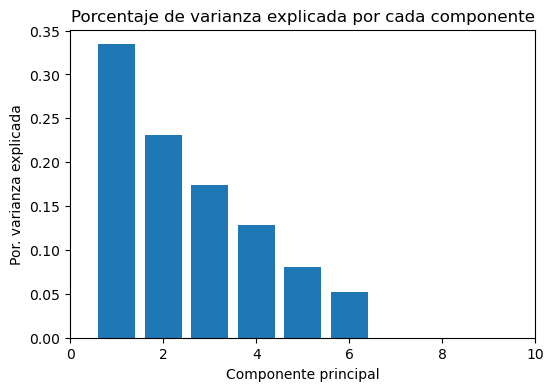

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

ax.set_xlim(0, 10)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Text(0.5, 0, 'Componente principal')

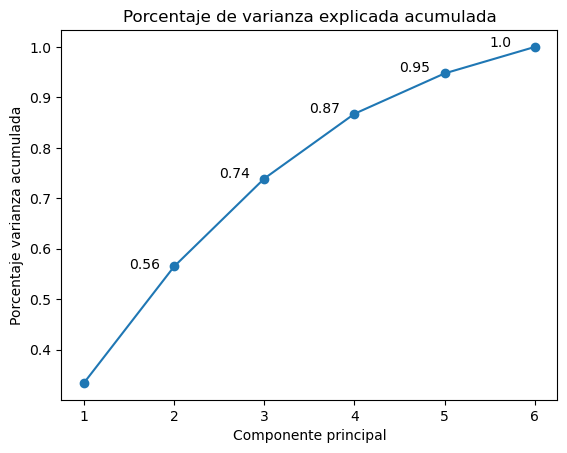

In [453]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(1, 1)
ax.plot(
    np.arange(len(X[0,:])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for i in range(1,len(prop_varianza_acum)):
    y = prop_varianza_acum[i]
    label = round(y, 2)
    ax.text(i+0.5,label, str(label), fontsize=10, color='black')

plt.title('Porcentaje de varianza explicada acumulada')   
plt.ylabel('Porcentaje varianza acumulada')
plt.xlabel('Componente principal')

# Kmeans

## Repaso del algoritmo de  [Kmeans](https://www.youtube.com/watch?v=4b5d3muPQmA)

 - **[Kameans](https://www.youtube.com/watch?v=4b5d3muPQmA)** es un algoritmo que se comúnmente se aplica a problemas de **aprendizaje no supervisado** (las variables no están etiquetadas).
 - El objetivo de este algoritmo es encontrar k-grupos en los datos.


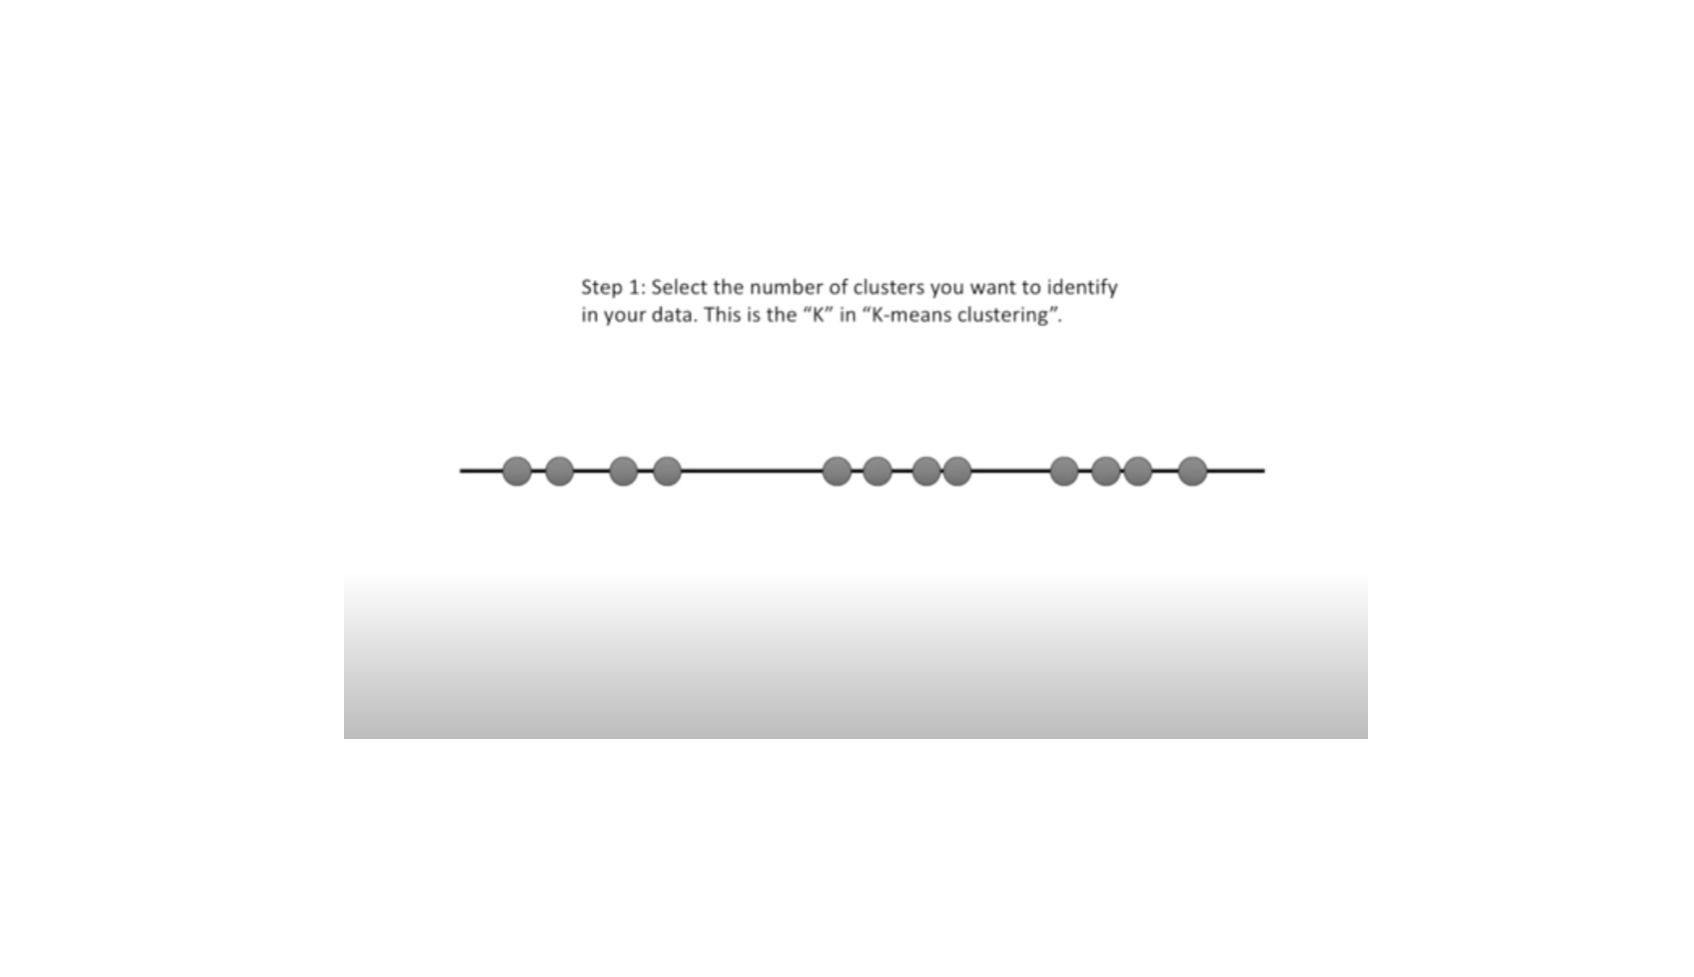

Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

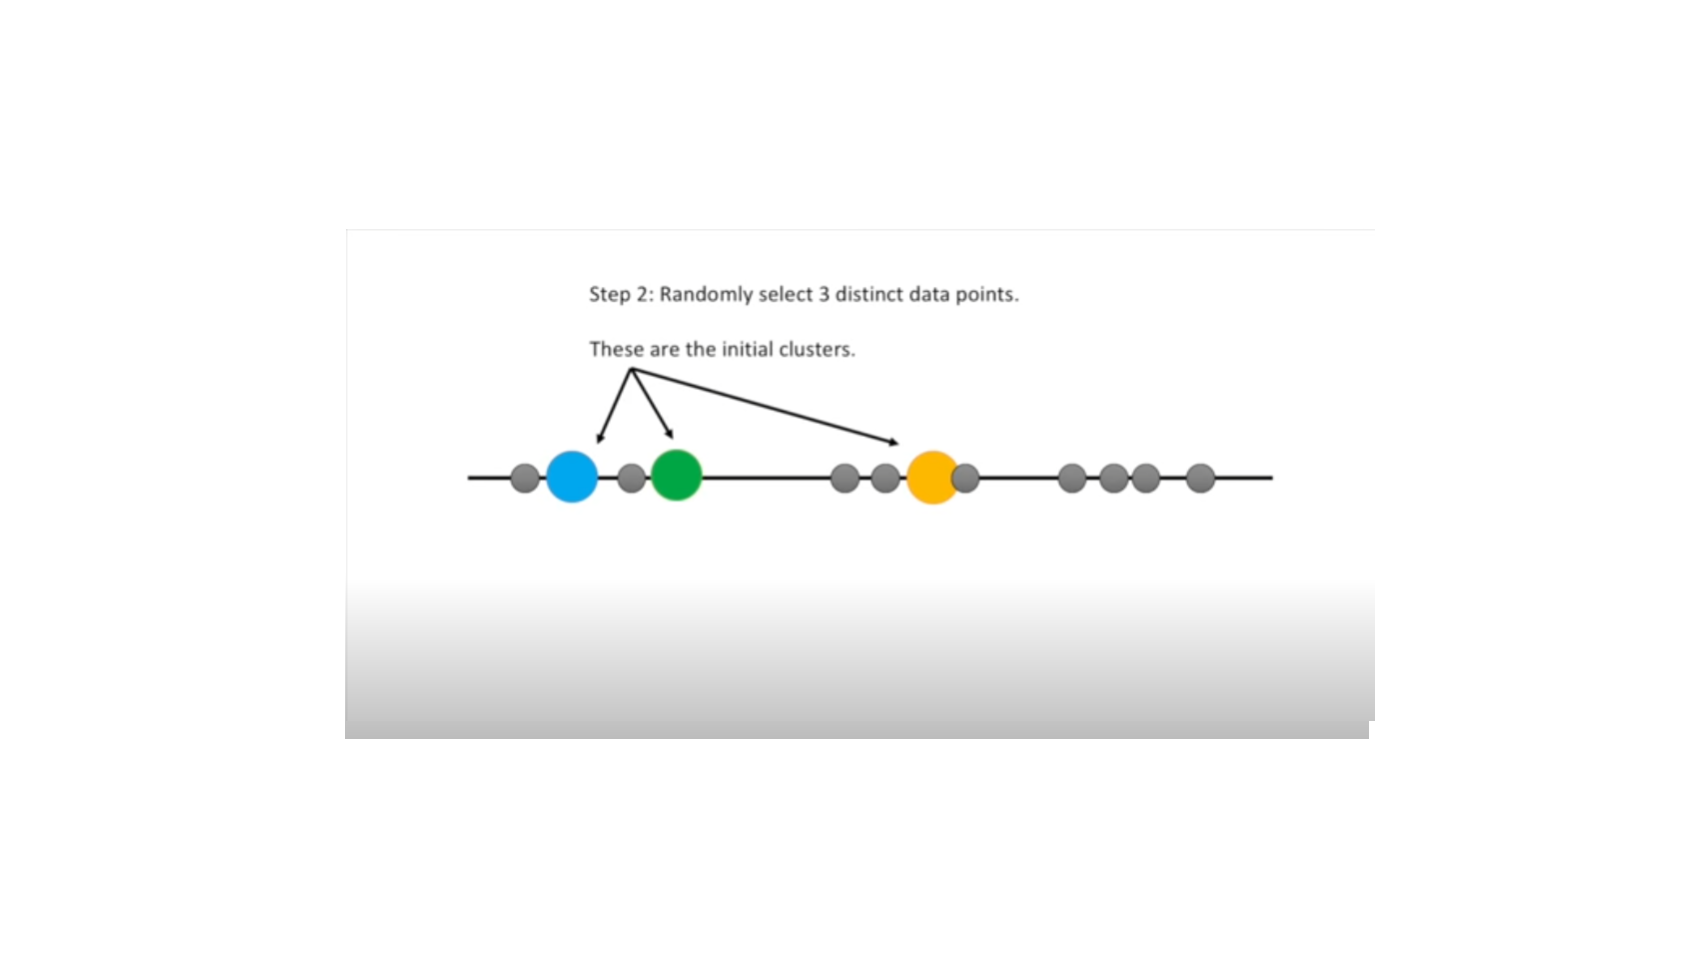
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

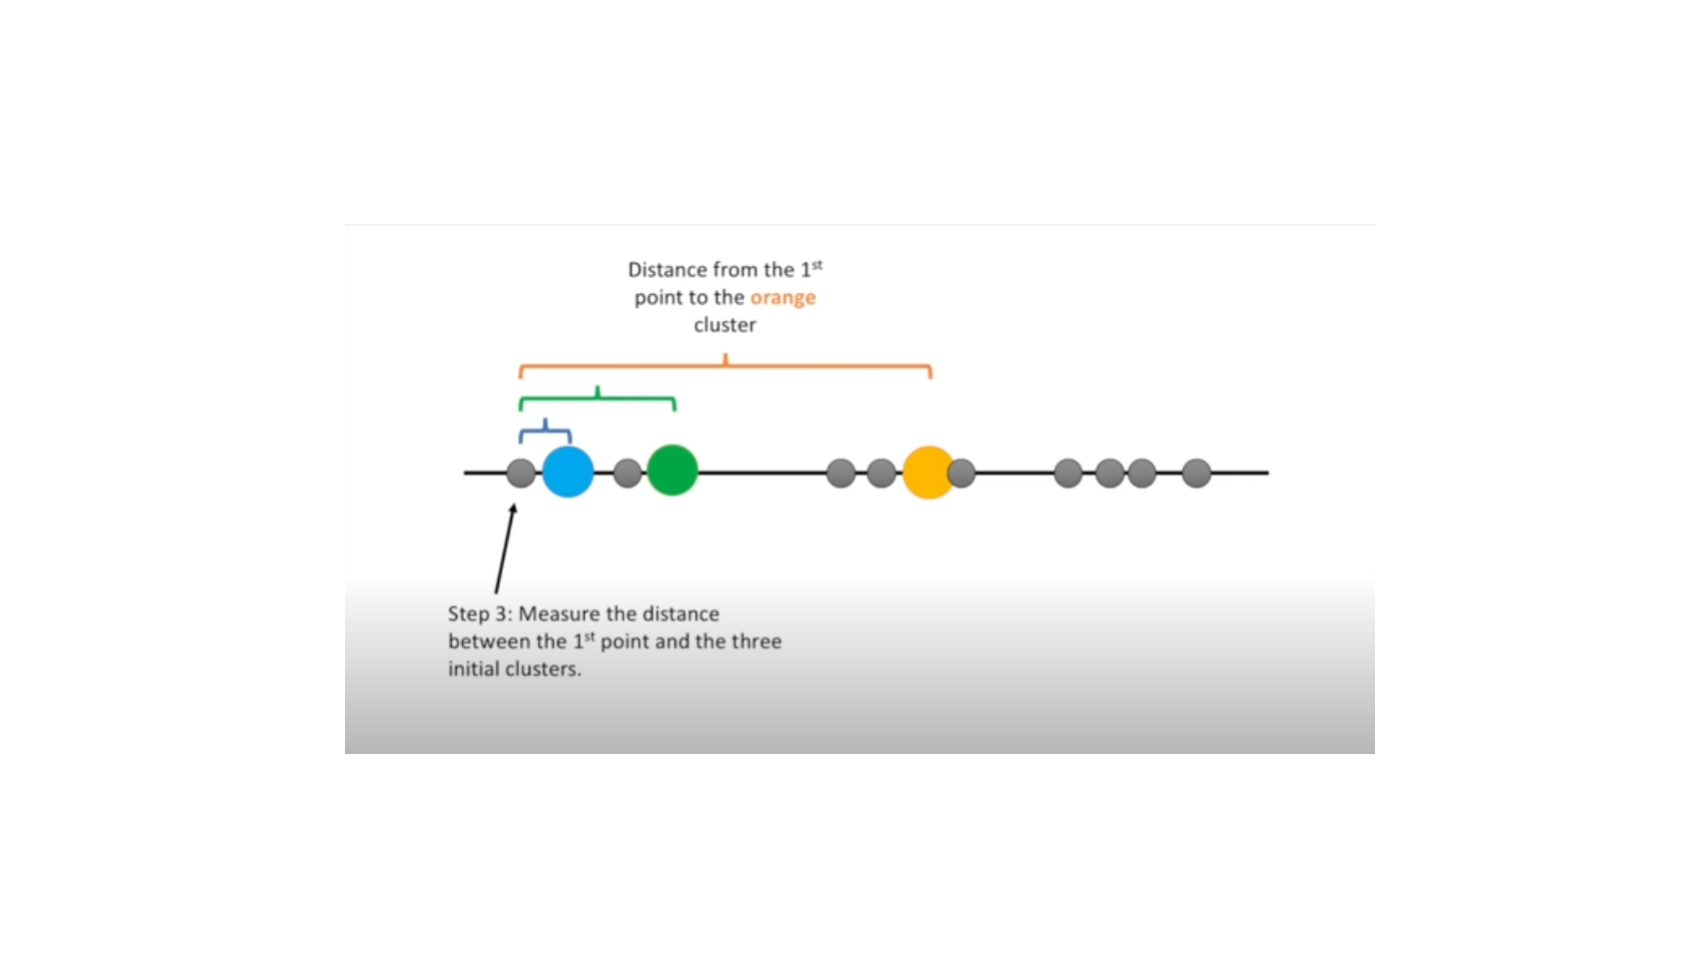
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

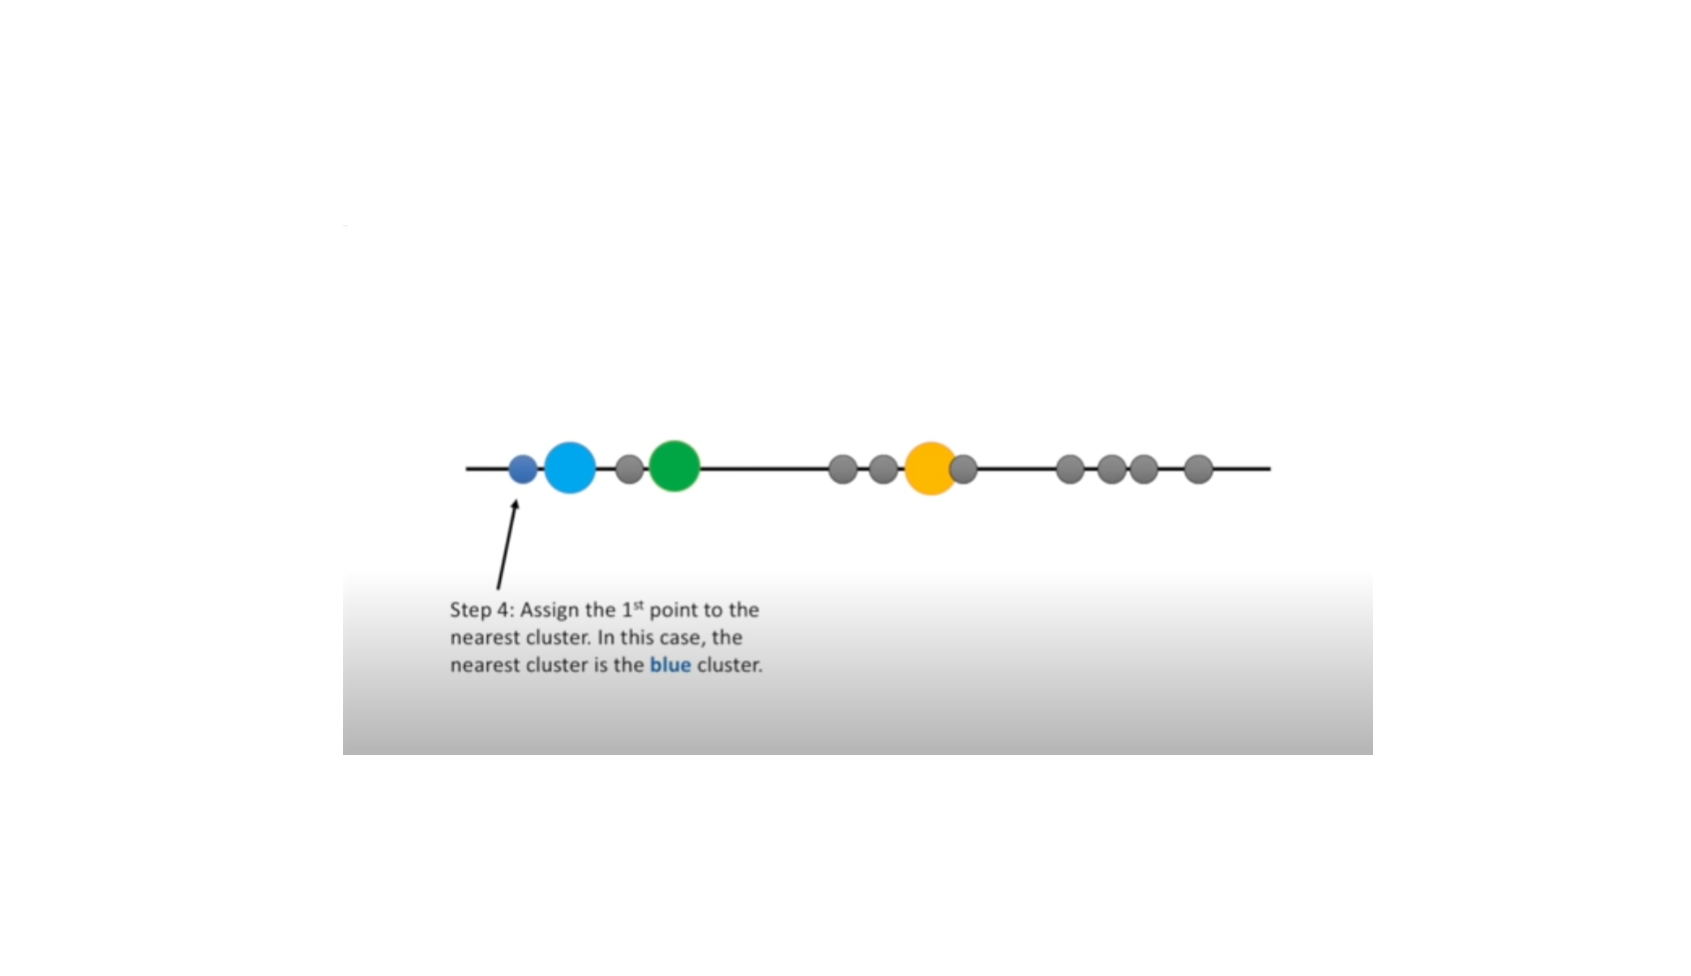
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

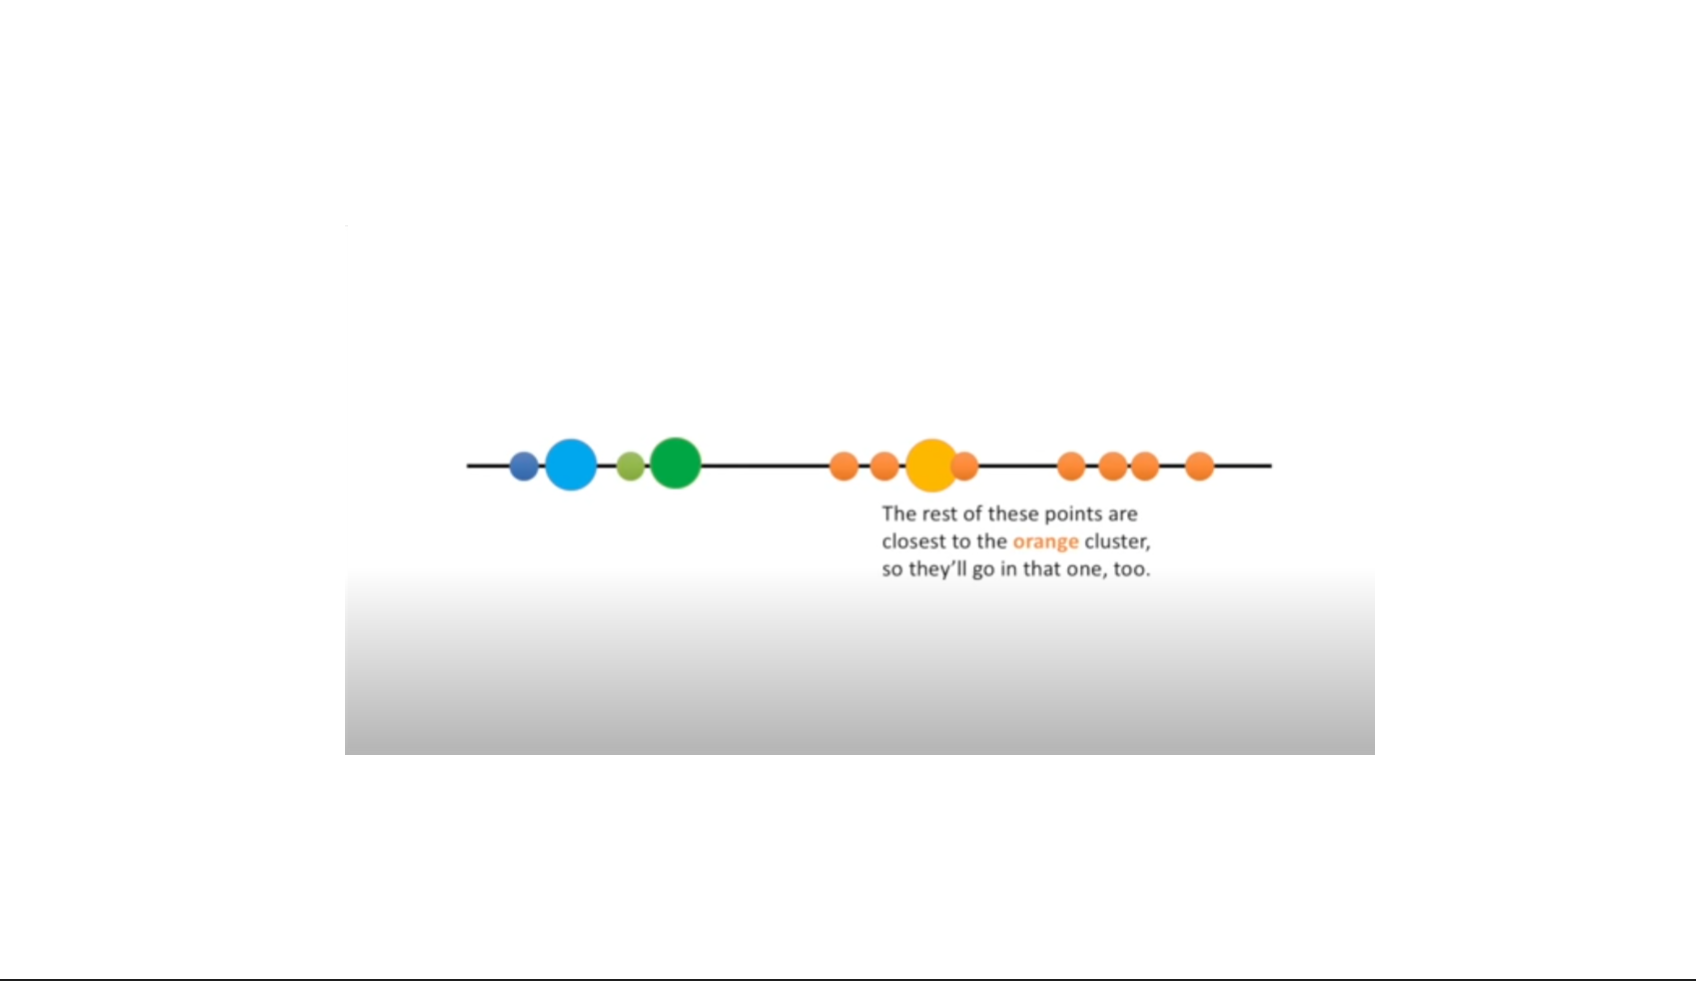
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

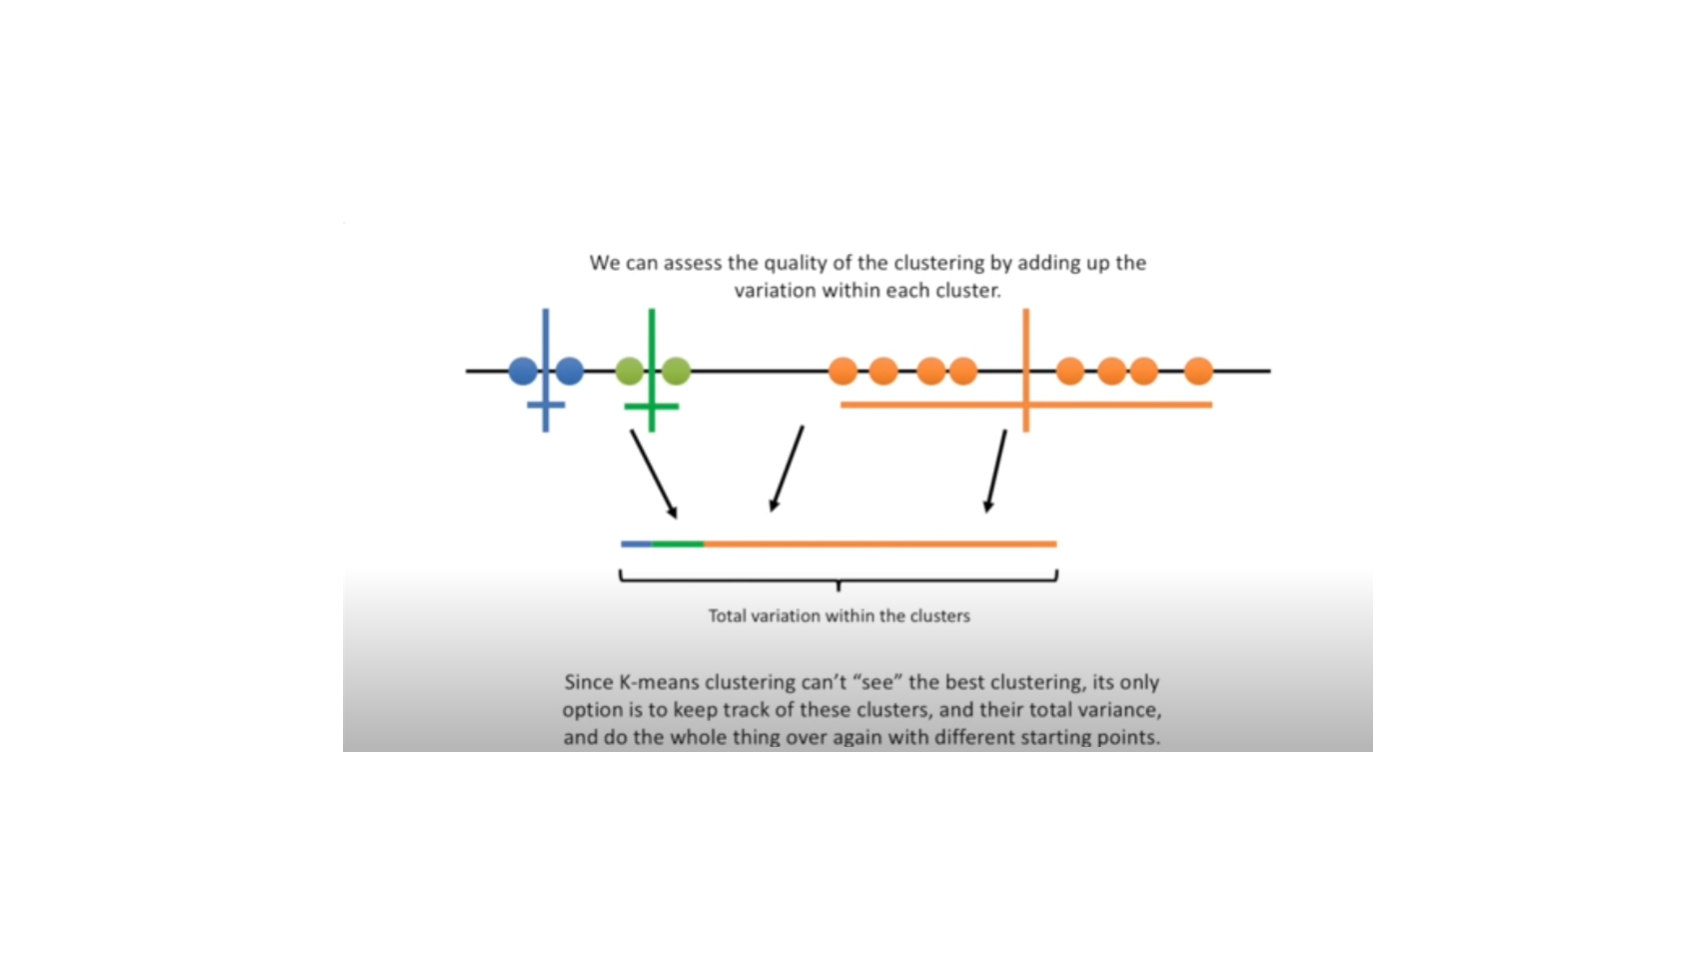
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

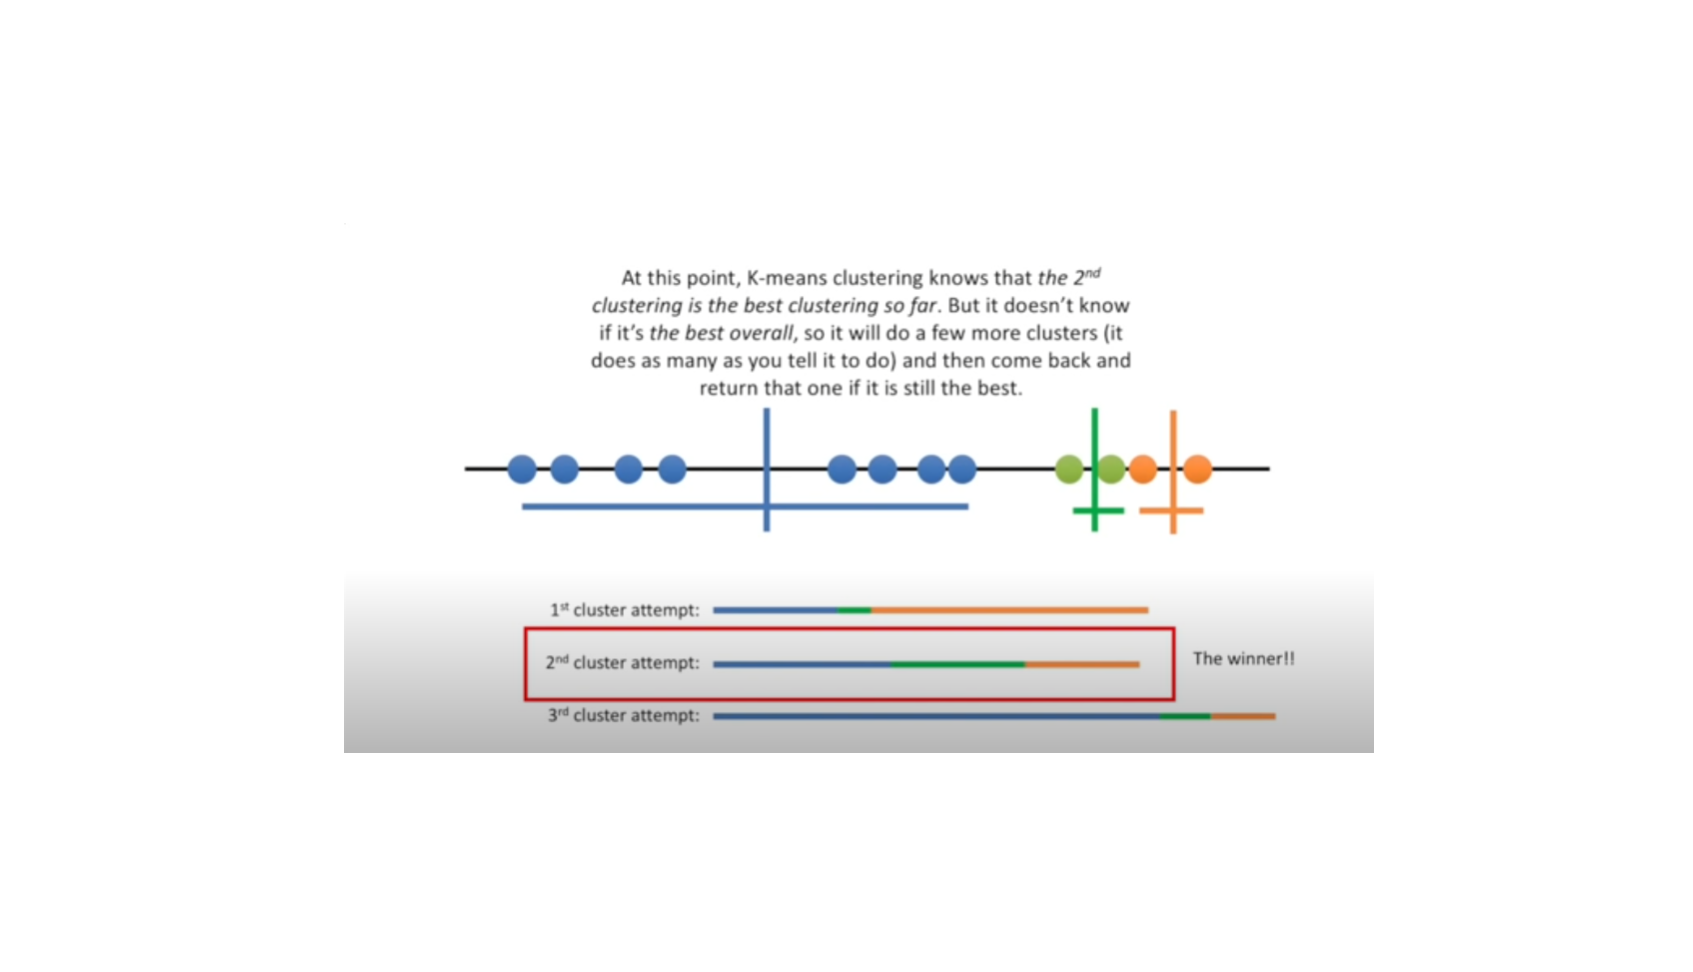
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

¿Elección de k?

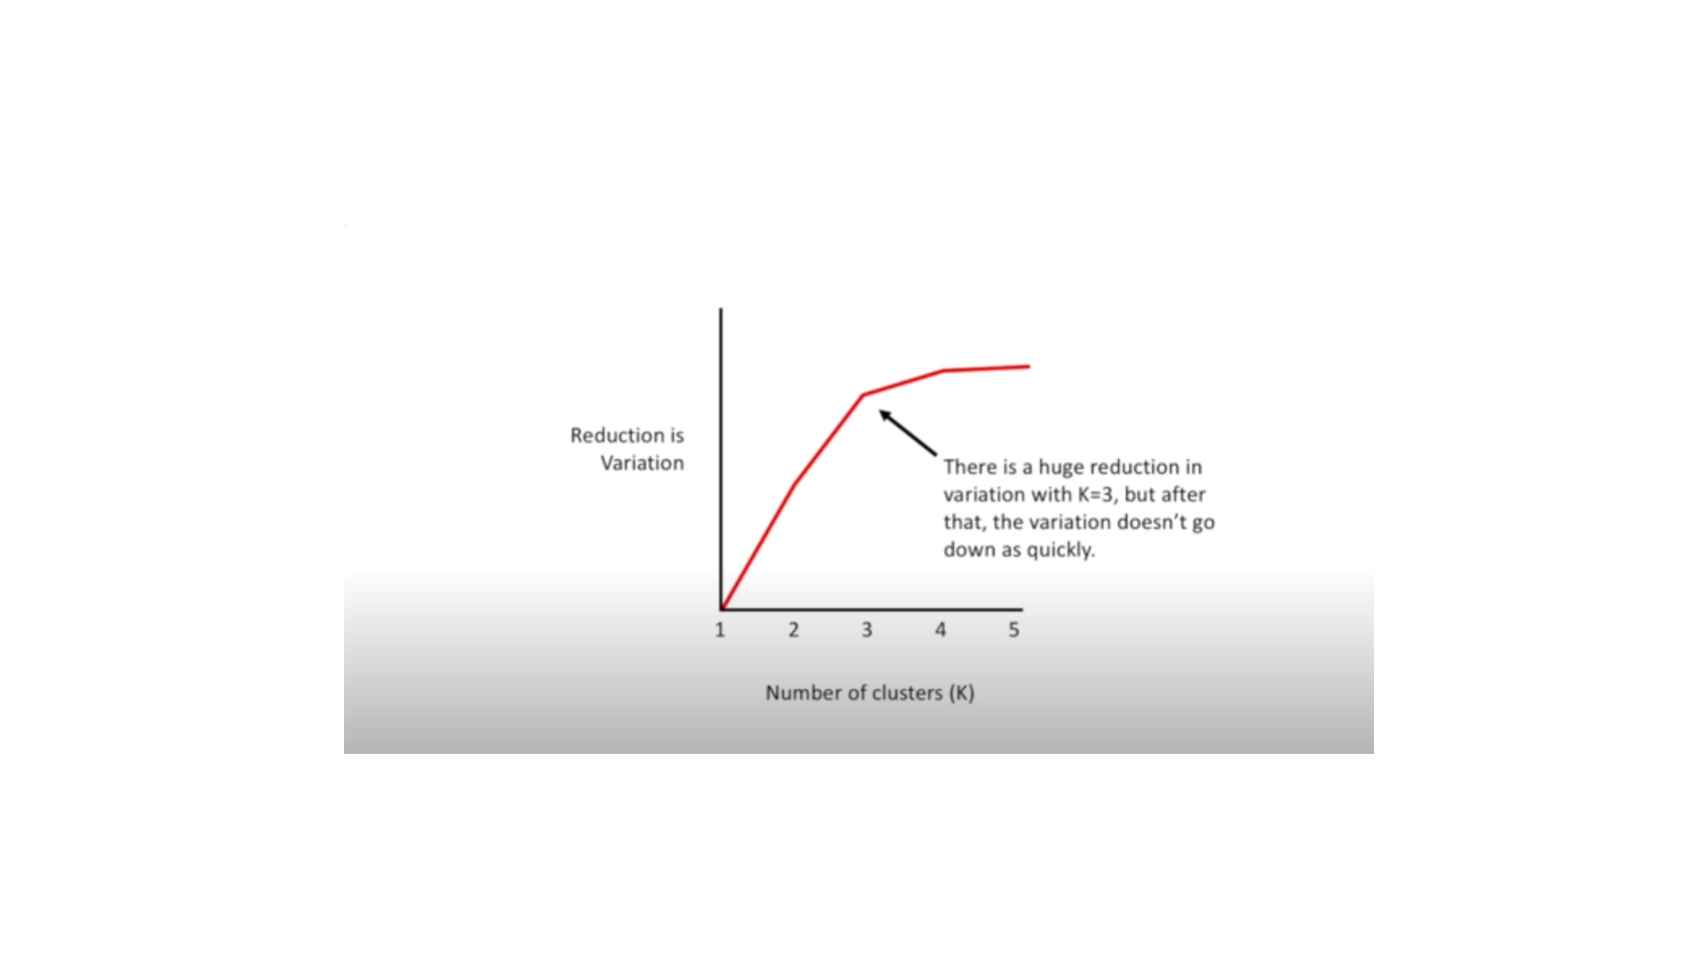
Imagen tomada de: https://www.youtube.com/watch?v=4b5d3muPQmA

## Aplicando Kmeans con la librería [sklearn](https://scikit-learn.org/stable/index.html) de python

In [358]:
import pandas as pd
from sklearn.metrics import silhouette_score

#scaling data
X_p=pre_processing(X,PCAs=False,normalizer=True)
X_pca2=pre_processing(X,PCAs=True,n_comp=2,normalizer=True)
X_pca3=pre_processing(X,PCAs=True,n_comp=3,normalizer=True)

def km(k,X):
    #applying Kmeans
    kmeans = KMeans(n_clusters=k).fit(X) 
    
    #results
    etiquetas = kmeans.labels_
    # lowest SSE value
    inertia=kmeans.inertia_
        
    return (kmeans,etiquetas,inertia)

In [360]:
#no PCA
result,etiquetas,inertia=km(3,X_p)
ss=silhouette_score(X_p, etiquetas)

#2 PCAs
result_pca2,etiquetas_pca2,inertia_pca2=km(3,X_pca2)
ss_pca2=silhouette_score(X_pca2, etiquetas_pca2)

#3 PCAs
result_pca3,etiquetas_pca3,inertia_pca3=km(3,X_pca3)
ss_pca3=silhouette_score(X_pca3, etiquetas_pca3)

In [361]:
# adding the results to the data frames
X_p['Etiquetas_pca']=etiquetas_pca2
X_p['Etiquetas']=etiquetas

X_pca2['Etiquetas']=etiquetas_pca2

X_pca3['Etiquetas']=etiquetas_pca3

# Calidad del modelo

Utilizaremos dos tipos de medidas para evaluar la calidad de modelo:

1. SSE: "sum of square error"

\begin{equation}
SSE = \sum_{i=1}^{n} (X_i-\bar{X})^2
\end{equation}

2. [**Silhouette Coefficients**](https://es.wikipedia.org/wiki/Silhouette_(clustering)) 

Distancia media de los puntos dentro de un cluster:

\begin{equation}
a(i)=\frac{1}{|C_I|-1}\sum_{j \in C_I, i\neq j} d(i,j)
\end{equation}

Distancia mínima del a los puntos de los otros clusters:

\begin{equation}
b(i)= min\frac{1}{|C_k|}\sum_{j \in C_k} d(i,j), \ \ k\neq I
\end{equation}

La "silueta" para un punto i es:

\begin{equation}
s(i)= \frac{b(i)-a(i)}{max (b(i),a(i))}, \ \ si |C_I| > 1
\end{equation}

- $s(i)\sim  1 \rightarrow$ El dato está bien emparejado.
- $s(i)\sim -1 \rightarrow$ el dato pertenece a un cúmulo vecino.
- $s(i)\sim  0 \rightarrow$ el dato se encuentra al borde de dos cúmulos.

In [373]:
print('SSE no PCAs: ',inertia,', ','S no PCAs: ',ss)
print('SSE 2 PCAs: ',inertia_pca2,', ','S 2 PCAs: ',ss_pca2)
print('SSE 3 PCAs: ',inertia_pca3,', ','S 3 PCAs: ',ss_pca3)

SSE no PCAs:  832.6986323196468 ,  S no PCAs:  0.27092965104984884
SSE 2 PCAs:  212.05668673965658 ,  S 2 PCAs:  0.5059610222668964
SSE 3 PCAs:  462.17123209050715 ,  S 3 PCAs:  0.3719565743838186


In [374]:
#Use the PCA labels in no PCA space and obtain SSE to compare
Xp_means=X_p.groupby(['Etiquetas_pca']).mean() 

SSE_1=np.sum(np.sum((X_p.iloc[:,:-2][X_p.Etiquetas_pca==0]-Xp_means.iloc[0,:-1])**2))
SSE_2=np.sum(np.sum((X_p.iloc[:,:-2][X_p.Etiquetas_pca==1]-Xp_means.iloc[1,:-1])**2))
SSE_3=np.sum(np.sum((X_p.iloc[:,:-2][X_p.Etiquetas_pca==2]-Xp_means.iloc[2,:-1])**2))

SSE_1+SSE_2+SSE_3

835.5814387028641

## Elegir k

In [369]:
# calculate distortion for a range of number of clusters
SSE = []
SSE_pca = []

for k in range(1, 11):

    SSE.append(km(k,X_p)[2])
    SSE_pca.append(km(k,X_pca2)[2])

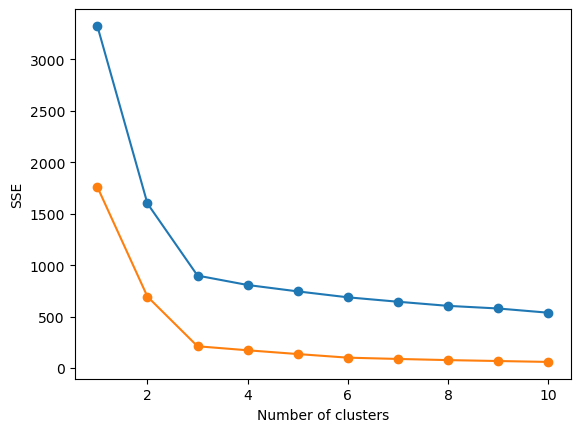

In [368]:
# plot
plt.plot(range(1, 11), SSE, marker='o')
plt.plot(range(1, 11), SSE_pca, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [456]:
from kneed import KneeLocator, DataGenerator as dg 
kl = KneeLocator(
        range(1, 11), SSE, curve="convex", direction="decreasing"
       )

k2 = KneeLocator(
        range(1, 11), SSE_pca, curve="convex", direction="decreasing"
       )

print('k no PCAs:', kl.elbow) 
print('k PCAs: ', k2.elbow)

k no PCAs: 3
k PCAs:  3


# Resultados

- Utilizamos [Seaborn](https://seaborn.pydata.org/) para hacer "pair-plots" con la librería seaborn.
- En el espacio de las PCAs.
- En el espacio de las variables sin transformar.

In [375]:
import seaborn as sns

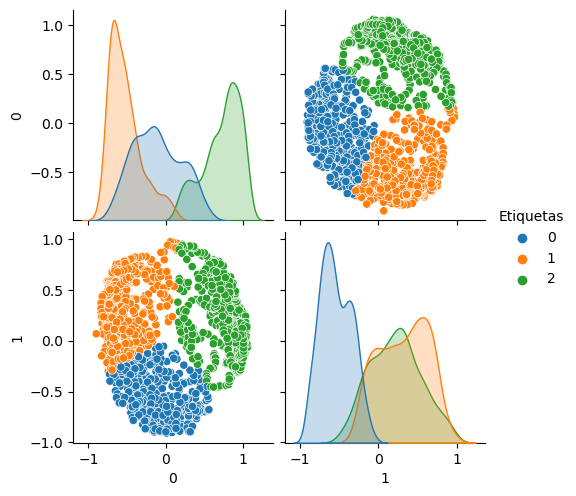

In [337]:
# 2-PCAs space
sns.pairplot(X_pca2,hue="Etiquetas",palette='tab10')

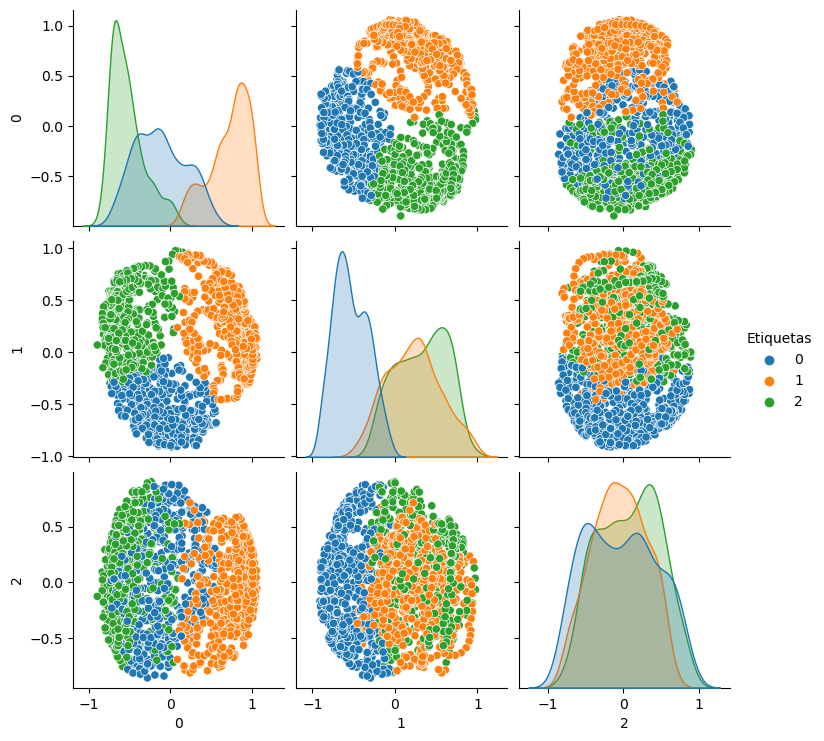

In [338]:
# 3-PCAs space
sns.pairplot(X_pca3,hue="Etiquetas",palette='tab10')

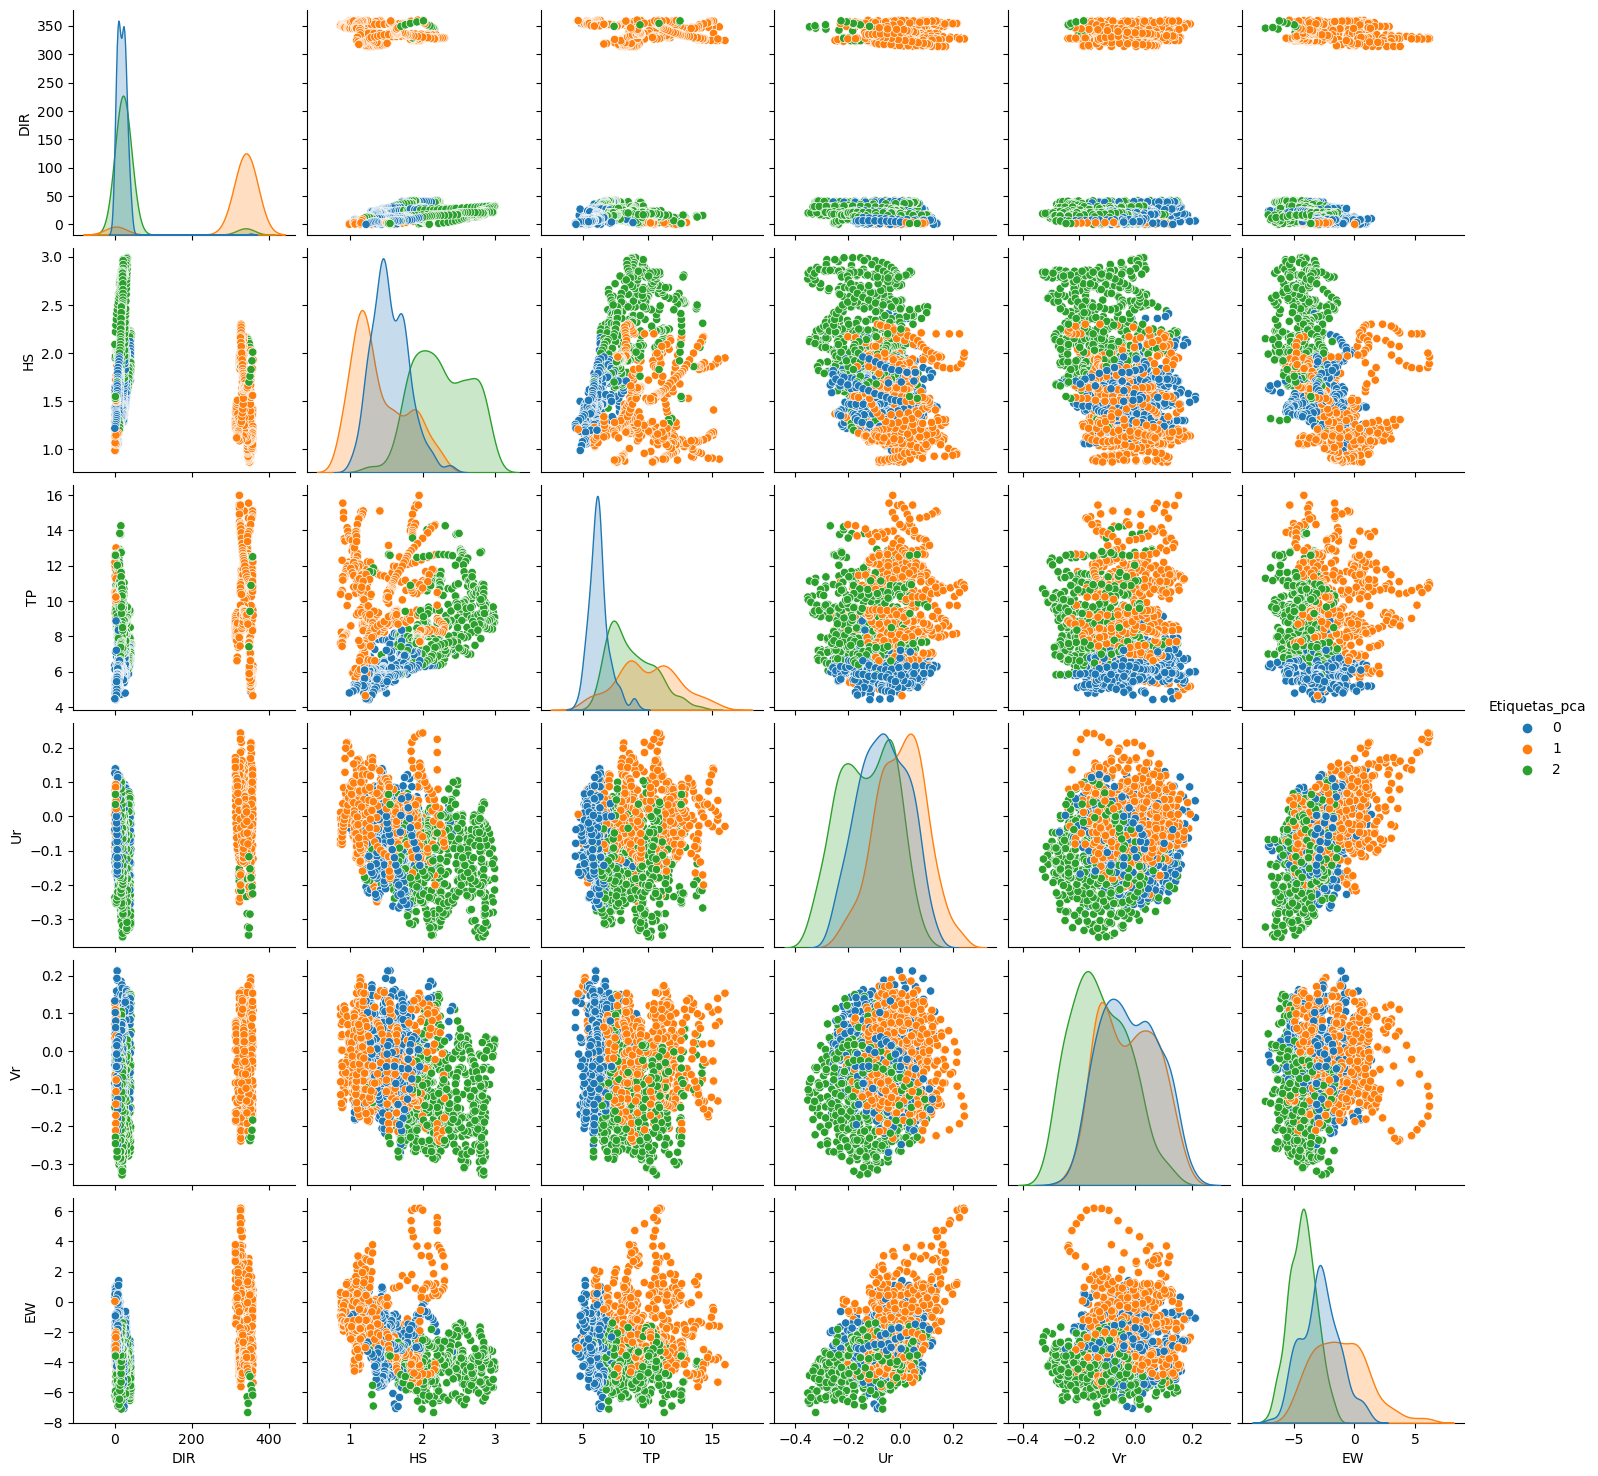

In [340]:
#In original space
X_df=pd.DataFrame(dict(DIR=DIR,HS=HS,TP=TP,Ur=Ur,Vr=Vr,EW=EW, Etiquetas_pca=etiquetas_pca2))
sns.pairplot(X_df,hue="Etiquetas_pca",palette='tab10')

Referencia paleta de colores: [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

# Otro método de clustering con skleanr

## Método [DBSCAN](https://www.youtube.com/watch?v=RDZUdRSDOok)

In [442]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

def db(X,eps,min_samples): 
    
    try:

        # Instantiate k-means and dbscan algorithms and Fit the algorithms to the features
        result = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

        # Compute the silhouette scores for each algorithm
        dbscan_silhouette = silhouette_score(X, result.labels_)

        return( result.labels_,dbscan_silhouette)
    except ValueError:
        print('Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)')

In [450]:
from sklearn.neighbors import NearestNeighbors

X_db=X_p.iloc[:,:-2]

#choose epsilon for a given k
min_samples=X_db.shape[1]*2

#we choose k ad hoc as the double of the number of variables
k = min_samples if min_samples >2 else 2

#We apply the Nearest Neightbors method to find epsilon to have k neightbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X_db)
distances, indices = nbrs.kneighbors(X_db)

In [451]:
#Exploring the distances matrix
print("k: " +str(min_samples))

for enum, row in enumerate(distances[:5]):
    print("Observation "+str(enum)+ "distances :" + str([round(x,2) for x in row]))

k: 12
Observation 0distances :[0.0, 0.13, 0.17, 0.2, 0.22, 0.22, 0.24, 0.25, 0.28, 0.28, 0.29, 0.29]
Observation 1distances :[0.0, 0.12, 0.2, 0.22, 0.23, 0.25, 0.27, 0.27, 0.28, 0.29, 0.3, 0.32]
Observation 2distances :[0.0, 0.14, 0.17, 0.2, 0.23, 0.26, 0.26, 0.27, 0.28, 0.28, 0.3, 0.3]
Observation 3distances :[0.0, 0.13, 0.17, 0.18, 0.19, 0.24, 0.25, 0.25, 0.27, 0.27, 0.31, 0.31]
Observation 4distances :[0.0, 0.13, 0.17, 0.23, 0.25, 0.25, 0.26, 0.29, 0.3, 0.31, 0.31, 0.31]


Text(0, 0.5, 'distance')

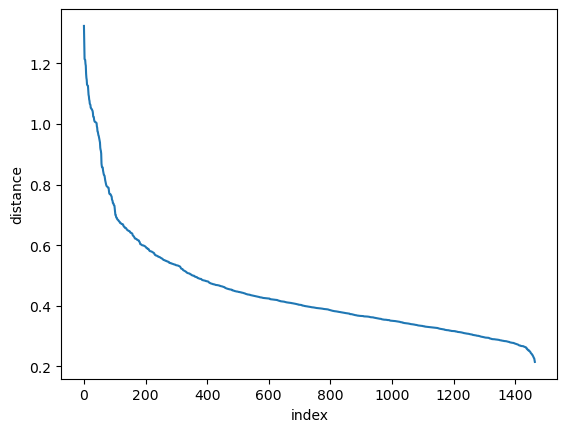

In [425]:
#farthest distances
fd=distances[:,-1]

fd_sorted=np.flip(np.sort(fd))

plt.plot(fd_sorted)
plt.xlabel("index")
plt.ylabel("distance")

In [426]:
k_epsilon = KneeLocator(
        range(0, len(fd_sorted)), fd_sorted, curve="convex", direction="decreasing"
       )

print('epsilon: ',fd_sorted[k_epsilon.elbow])

epsilon:  0.8569428059797665


In [452]:
etiquetas_db,silhouette_db=db(X_p,fd_sorted[k_epsilon.elbow],12)
print('SS: ', silhouette_db)

SS:  0.33739981955879456


C:\Users\turlionear\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


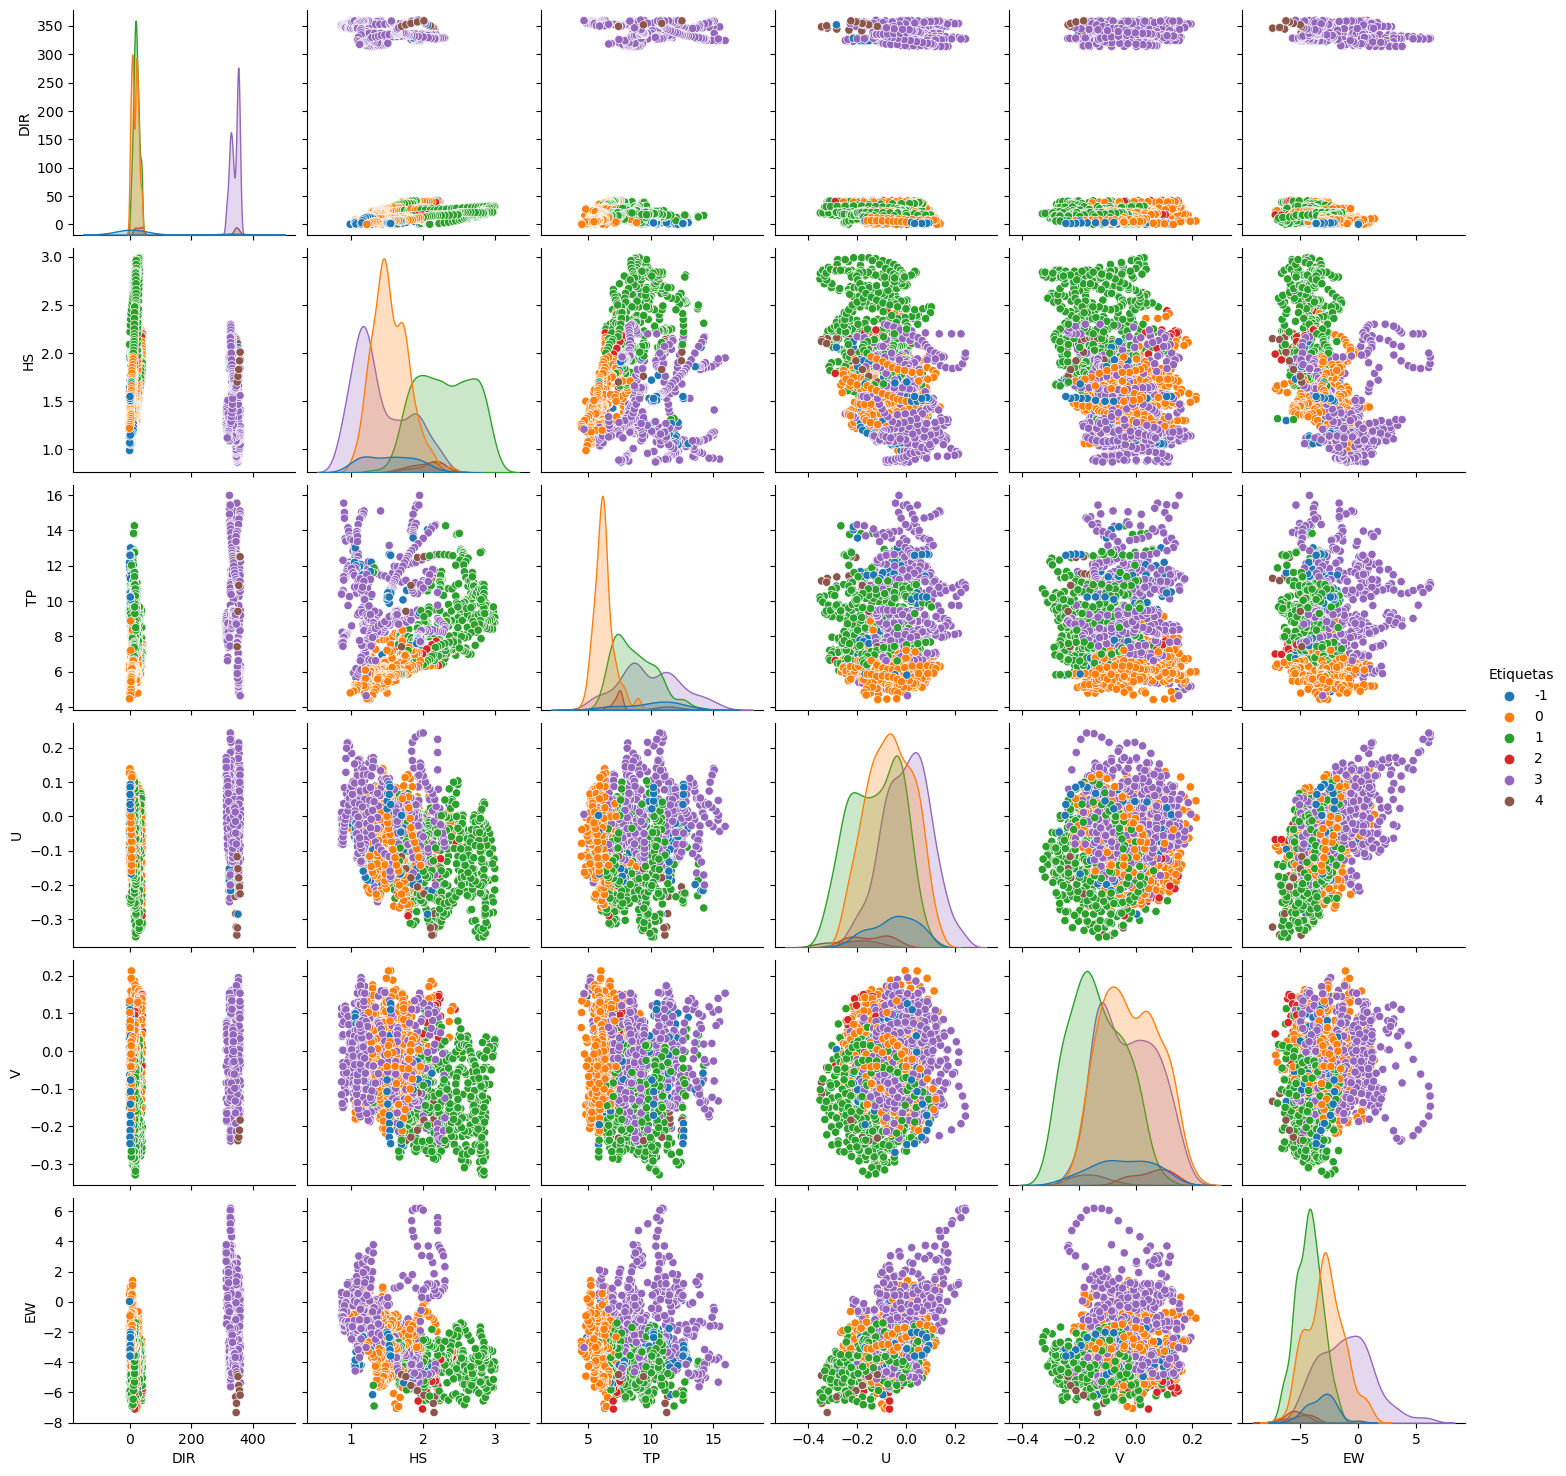

In [188]:
X_c=pd.DataFrame({'DIR':DIR,'HS':HS,'TP':TP,'U':Ur,'V':Vr,'EW':EW,'Etiquetas':etiquetas_db})

sns.pairplot(X_c,hue="Etiquetas",palette='tab10')